# WeatherPy
----

### Analysis
*  It is often supposed that temperatures on earth increase when approaching the equator.  However, not until now have we definitive evidence for this assertion.  When viewing [Temperature vs Latitude](#Output-Data-to-csv-file) there is a clear increase in temperature as one approaches 0 Deg. Latitude with a corresponding decrease as one moves away. In addition, cities in the southern hemisphere, associated with negative latitude coordinates, show relatively high temperatures compared to those in the northern hemisphere.  This is due to the earth's tilted axis and distribution of land and water.  The southern hemisphere is largely water compared to the north.  Thus, the region retains energy during the north's winter yielding comparatively warm temperatures.  The prevalence of water in the southern hemisphere also explains the lopsided distribution of cities we observe in the chart.  There are simply more cities in the northern hemisphere due to more land area.


* There is not a clear relationship between latitude and wind speed. However, [this graphic](#Latitude-vs.-Wind-Speed-Plot) indicates wind speeds generally do not rise above 20 mph and most are lower than 15 mph.


*  There appears to be no relationship between latitude and humidity.  [This chart](#Latitude-vs.-Humidity-Plot) displays humidity and latitude.  While there is no obervable correlation, most of the data tend to be clustered in the 40% to 100% range.  This could indicate a normal distribution for city humidities worldwide given most cities are not in the middle of deserts. 

---



In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


#### Define supporting variables

In [5]:
# Number of unique cities desired
num_cities = 500

#Define list for housing dictionaries of city weather information
city_dict = []

#Define index/increment variable
ind = 0

#List of unique city names that have been called.  
city_names = []

# Base url for API call
url_source = "http://api.openweathermap.org/data/2.5/weather?"

# Range of latitudes
lat_range = (-90, 90)



#### Loop to obtain city data

In [8]:

# Loop until you have X number of unique randomly chosen cities with corresponding weather data
while ind < num_cities:
    
    # Generate random latitude and longitude 
    lat = np.random.uniform(low=-90.000, high=90.000)
    lng = np.random.uniform(low=-180.000, high=180.000)

    # Identify nearest city for lat / lng combination using citipy API
    city = citipy.nearest_city(lat, lng).city_name
    
    # Skip everything else and start again if the city name is already in our city names list
    if city in city_names:
        continue
    
    # Add unique city name to city_names list
    city_names.append(city)
    #city_names.add(city)
      
    # Construct URI for API call
    query_url = url_source + "appid=" + api_key + "&q=" + city + "&units=imperial"
    
    # Call API and JSONify the API response
    weather_json = requests.get(query_url).json()
    
    # Define function to test validity of JSON response from openweather
    def isGoodData(json):
        return json['cod'] == 200 
    
    # If the city has good data (returns code 200), add it to a our cities list of dictionaries
    if isGoodData(weather_json):
        city_dict.append({})
        city_dict[ind]['Name'] = city
        city_dict[ind]['Country'] = weather_json['sys']['country']
        city_dict[ind]['ID'] = weather_json['id']
        city_dict[ind]['Latitude'] = weather_json['coord']['lat']
        city_dict[ind]['Longitude'] = weather_json['coord']['lon']
        city_dict[ind]['Max Temp'] = weather_json['main']['temp_max'] 
        city_dict[ind]['Clouds'] = weather_json['clouds']['all']
        city_dict[ind]['Wind Speed'] = weather_json['wind']['speed']
        city_dict[ind]['Humidity'] = weather_json['main']['humidity']
        
        # Increment our index since we've collected good data for another unique city
        ind += 1
        # Log the city info to the console/screen
        print(f"City Name: {weather_json['name'],weather_json['sys']['country']} -- City ID: {weather_json['id']}")

City Name: ('Geraldton', 'CA') -- City ID: 5960603
City Name: ('Pangody', 'RU') -- City ID: 1495626
City Name: ('Raudeberg', 'NO') -- City ID: 3146487
City Name: ('Bend', 'US') -- City ID: 5713587
City Name: ('Arraial do Cabo', 'BR') -- City ID: 3471451
City Name: ('Saint-Philippe', 'CA') -- City ID: 6138908
City Name: ('Thompson', 'CA') -- City ID: 6165406
City Name: ('Atuona', 'PF') -- City ID: 4020109
City Name: ('Tiksi', 'RU') -- City ID: 2015306
City Name: ('Touros', 'BR') -- City ID: 3386213
City Name: ('Lorengau', 'PG') -- City ID: 2092164
City Name: ('Eyl', 'SO') -- City ID: 60019
City Name: ('Yatou', 'CM') -- City ID: 2225940
City Name: ('Yellowknife', 'CA') -- City ID: 6185377
City Name: ('Warrnambool', 'AU') -- City ID: 2144528
City Name: ('Carnarvon', 'ZA') -- City ID: 1014034
City Name: ('Sosua', 'DO') -- City ID: 3492627
City Name: ('Nyurba', 'RU') -- City ID: 2018735
City Name: ('Cape Town', 'ZA') -- City ID: 3369157
City Name: ('Laguna', 'MX') -- City ID: 4013704
City N

#### Convert Raw Data to DataFrame

In [9]:

city_df = pd.DataFrame(city_dict)
city_df.head()

,Clouds,Country,Humidity,ID,Latitude,Longitude,Max Temp,Name,Wind Speed
0,90,JP,75,1865309,33.93,134.50,44.60,katsuura,8.05
1,90,CA,75,6170031,69.44,-133.03,-14.81,tuktoyaktuk,11.41
2,20,CA,75,5960603,49.72,-86.95,-13.01,geraldton,4.70
3,0,RU,57,1495626,65.85,74.49,-19.60,pangody,14.56
4,76,NO,100,3146487,61.99,5.14,37.40,raudeberg,12.75


In [10]:
#Check total number of unique cities collected
num_Cities = city_df['ID'].nunique()
num_Cities

61

#### Output Data to csv file

In [11]:
city_df.to_csv(output_data_file)
# city_df['Latitude'] = city_df['Latitude'].astype(float)
# city_df['Max Temp'] = city_df['Max Temp'].astype(float)

## Plotting the Data

#### Latitude vs. Temperature Plot

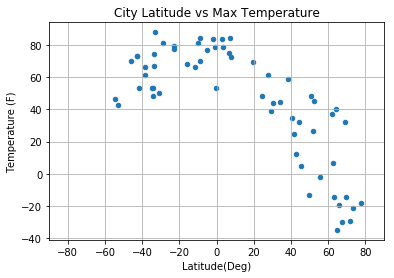

In [28]:

city_df.plot(kind="scatter", x = 'Latitude', y = 'Max Temp', grid=True, xlim=lat_range, title='City Latitude vs Max Temperature')
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude(Deg)')
plt.savefig('output_data/latVsTemp.png')
plt.show()

#### Latitude vs. Humidity Plot

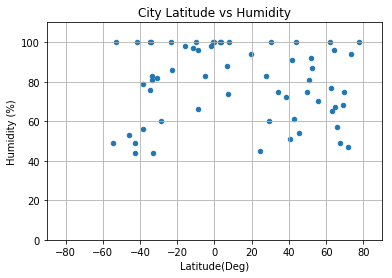

In [26]:
city_df.plot(kind="scatter", x = 'Latitude', y = 'Humidity', grid=True, ylim=(0,110),xlim=lat_range, title='City Latitude vs Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude(Deg)')
plt.savefig('output_data/latVsHumid.png')
plt.show()

#### Latitude vs. Cloudiness Plot

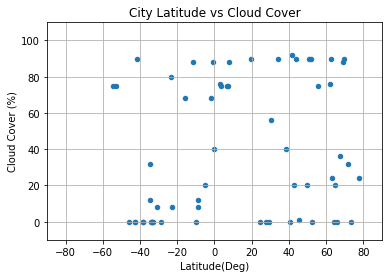

In [24]:
city_df.plot(kind="scatter", x = 'Latitude', y = 'Clouds', grid=True, ylim=(-10,110), xlim=lat_range, title='City Latitude vs Cloud Cover')
plt.ylabel('Cloud Cover (%)')
plt.xlabel('Latitude(Deg)')
plt.savefig('output_data/latVsClouds.png')
plt.show()

#### Latitude vs. Wind Speed Plot

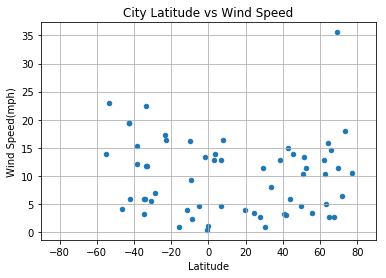

In [17]:
city_df.plot(kind="scatter", x = 'Latitude', y = 'Wind Speed', grid=True, xlim=lat_range, title='City Latitude vs Wind Speed')
plt.ylabel('Wind Speed(mph)')
plt.savefig('output_data/latVsWind.png')
plt.show()